In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784')
X = mnist.data.astype(np.float64) / 255.0  # Normalizando os valores para [0,1]

# X, _ = load_digits(return_X_y=True) #kernel pca esta com erro

In [24]:
# Aplicando PCA para reduzir as dimensões
pca = PCA(n_components=10)  # Usando 10 componentes principais para capturar a maior parte da variância
X_pca = pca.fit_transform(X)

# Geração de novas amostras latentes (amostragem de uma distribuição normal)
def generate_new_data(mu, log_var, n_samples):
    std = np.exp(0.5 * log_var)  # Desvio padrão a partir da log-variância
    epsilon = np.random.randn(n_samples, mu.size)  # Amostra da normal padrão com o tamanho correto
    return mu + std * epsilon

# Calculando a média e a log-variância da distribuição latente
mu = np.mean(X_pca, axis=0)
log_var = np.log(np.var(X_pca, axis=0))


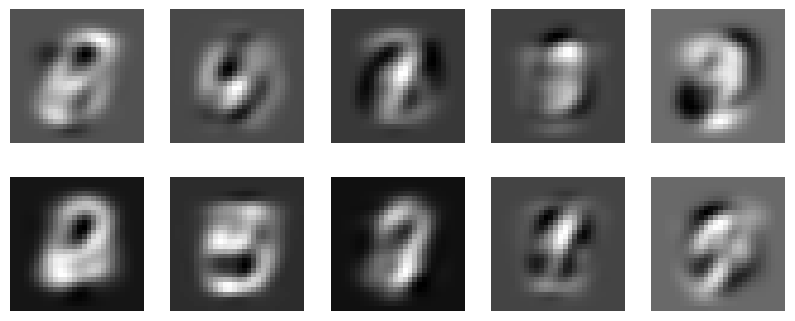

In [27]:
# Gerar novas amostras latentes
n_samples_new = 10  # Gerar 10 novas imagens
new_latent_samples = generate_new_data(mu, log_var, n_samples_new)

# Reconstruir as novas imagens no espaço original
new_images = pca.inverse_transform(new_latent_samples)

# Visualizar as novas imagens geradas
plt.figure(figsize=(10, 4))
for i in range(n_samples_new):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

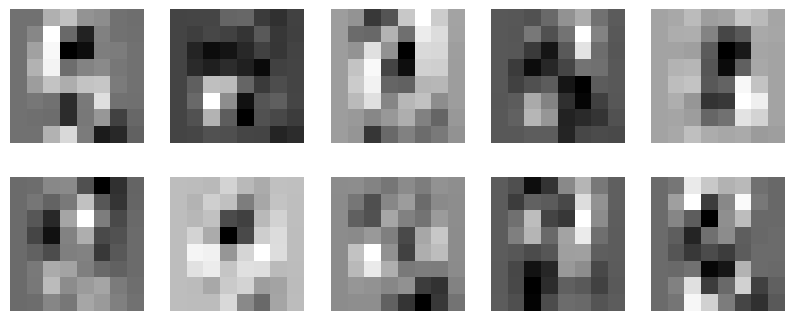

In [21]:
from sklearn.decomposition import KernelPCA

# Aplicando Kernel PCA para reduzir as dimensões
kpca = KernelPCA(n_components=10, kernel='cosine', fit_inverse_transform=True)  # Usando kernel RBF e 10 componentes principais
X_kpca = kpca.fit_transform(X)

# Calculando a média e a log-variância da distribuição latente
mu = np.mean(X_kpca, axis=0)
log_var = np.log(np.var(X_kpca, axis=0))

# Gerar novas amostras latentes
new_latent_samples = generate_new_data(mu, log_var, n_samples_new)

# Reconstruir as novas imagens no espaço original
new_images = kpca.inverse_transform(new_latent_samples)

# Visualizar as novas imagens geradas
plt.figure(figsize=(10, 4))
for i in range(n_samples_new):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_images[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
X, _ = load_digits(return_X_y=True)
transformer = KernelPCA(n_components=7, kernel='linear')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)